In [159]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import copy

In [220]:
def dynamics_model(s, a, p_h=0.4, target=100):
    """
    s: current capital level
    a: amount to bet
    
    returns tuples of (r, s, p)
    """
    if a > min(s, target-s):
        raise ValueError(f"Invalid action {a} for state {s}")
    
    if s > target or s < 0:
        raise ValueError(f"Invalid state {s} when target is {target}")
    
    if s == 0:
        return [(0, 0, 1)]
    
    if s == target:
        return [(0, target, 1)]
    
    if a == 0:
        return [(0, s, 1)]
    
    s_win = min(s + a, target)
    s_lose = max(s - a, 0)
    
    return [(0, s_lose, 1-p_h), (1 if s_win == target else 0, s_win, p_h)]

def permissible_actions(s, target):
    A = np.arange(0, min(s, target-s)+1, 1)
    return A, A.size 


def value_iteration(v_init, dynamics_model,num_runs=32):
    # the initialisation must give terminal states value zero
    assert v_init[0] == 0 and v_init[-1] == 0
    
    target = v_init.size - 1
    
    V = copy.deepcopy(v_init)
    V_hist = []
    
#     while delta > theta:
    # better to do loads of sweeps I think
    for i in range(num_runs):
        for s in range(1, target):
            delta = 0
            v = V[s]
            A, num_a = permissible_actions(s, target)
            action_values = np.zeros(shape=num_a)
            for indx, a in enumerate(A):
                poss_outcomes = dynamics_model(s, a)
                action_values[indx] = np.sum([p * (r + V[s_new]) for r, s_new, p in poss_outcomes])
#             action_values = np.around(action_values, 8)
            V[s] = np.max(action_values)
        V_hist.append(copy.deepcopy(V))
            
    # should really cache this stuff / not recalculate it, but this is a super small problem. 
    optimum_policy = []
    action_value_all = np.zeros(shape=(target-1, int(target/2)+1))
    for s in range(1, target):
        A, num_a = permissible_actions(s, target)
        action_values = np.zeros(shape=num_a)
        for indx, a in enumerate(A):
            poss_outcomes = dynamics_model(s, a)
            action_values[indx] = np.sum([p * (r + V[s_new]) for r, s_new, p in poss_outcomes])
            action_value_all[s-1, a] = np.sum([p * (r + V[s_new]) for r, s_new, p in poss_outcomes])
        action_values = np.around(action_values, 5)
        optimum_values = A[action_values == np.max(action_values)]
        optimum_policy.append((s, optimum_values))
        
    return V, optimum_policy, action_value_all, V_hist

Let's do a reproduction of the graph in the book first. 

In [200]:
target = 100
v_init = np.zeros(shape=target+1)

V, optimum_policy, action_value_all, V_hist = value_iteration(v_init, dynamics_model)

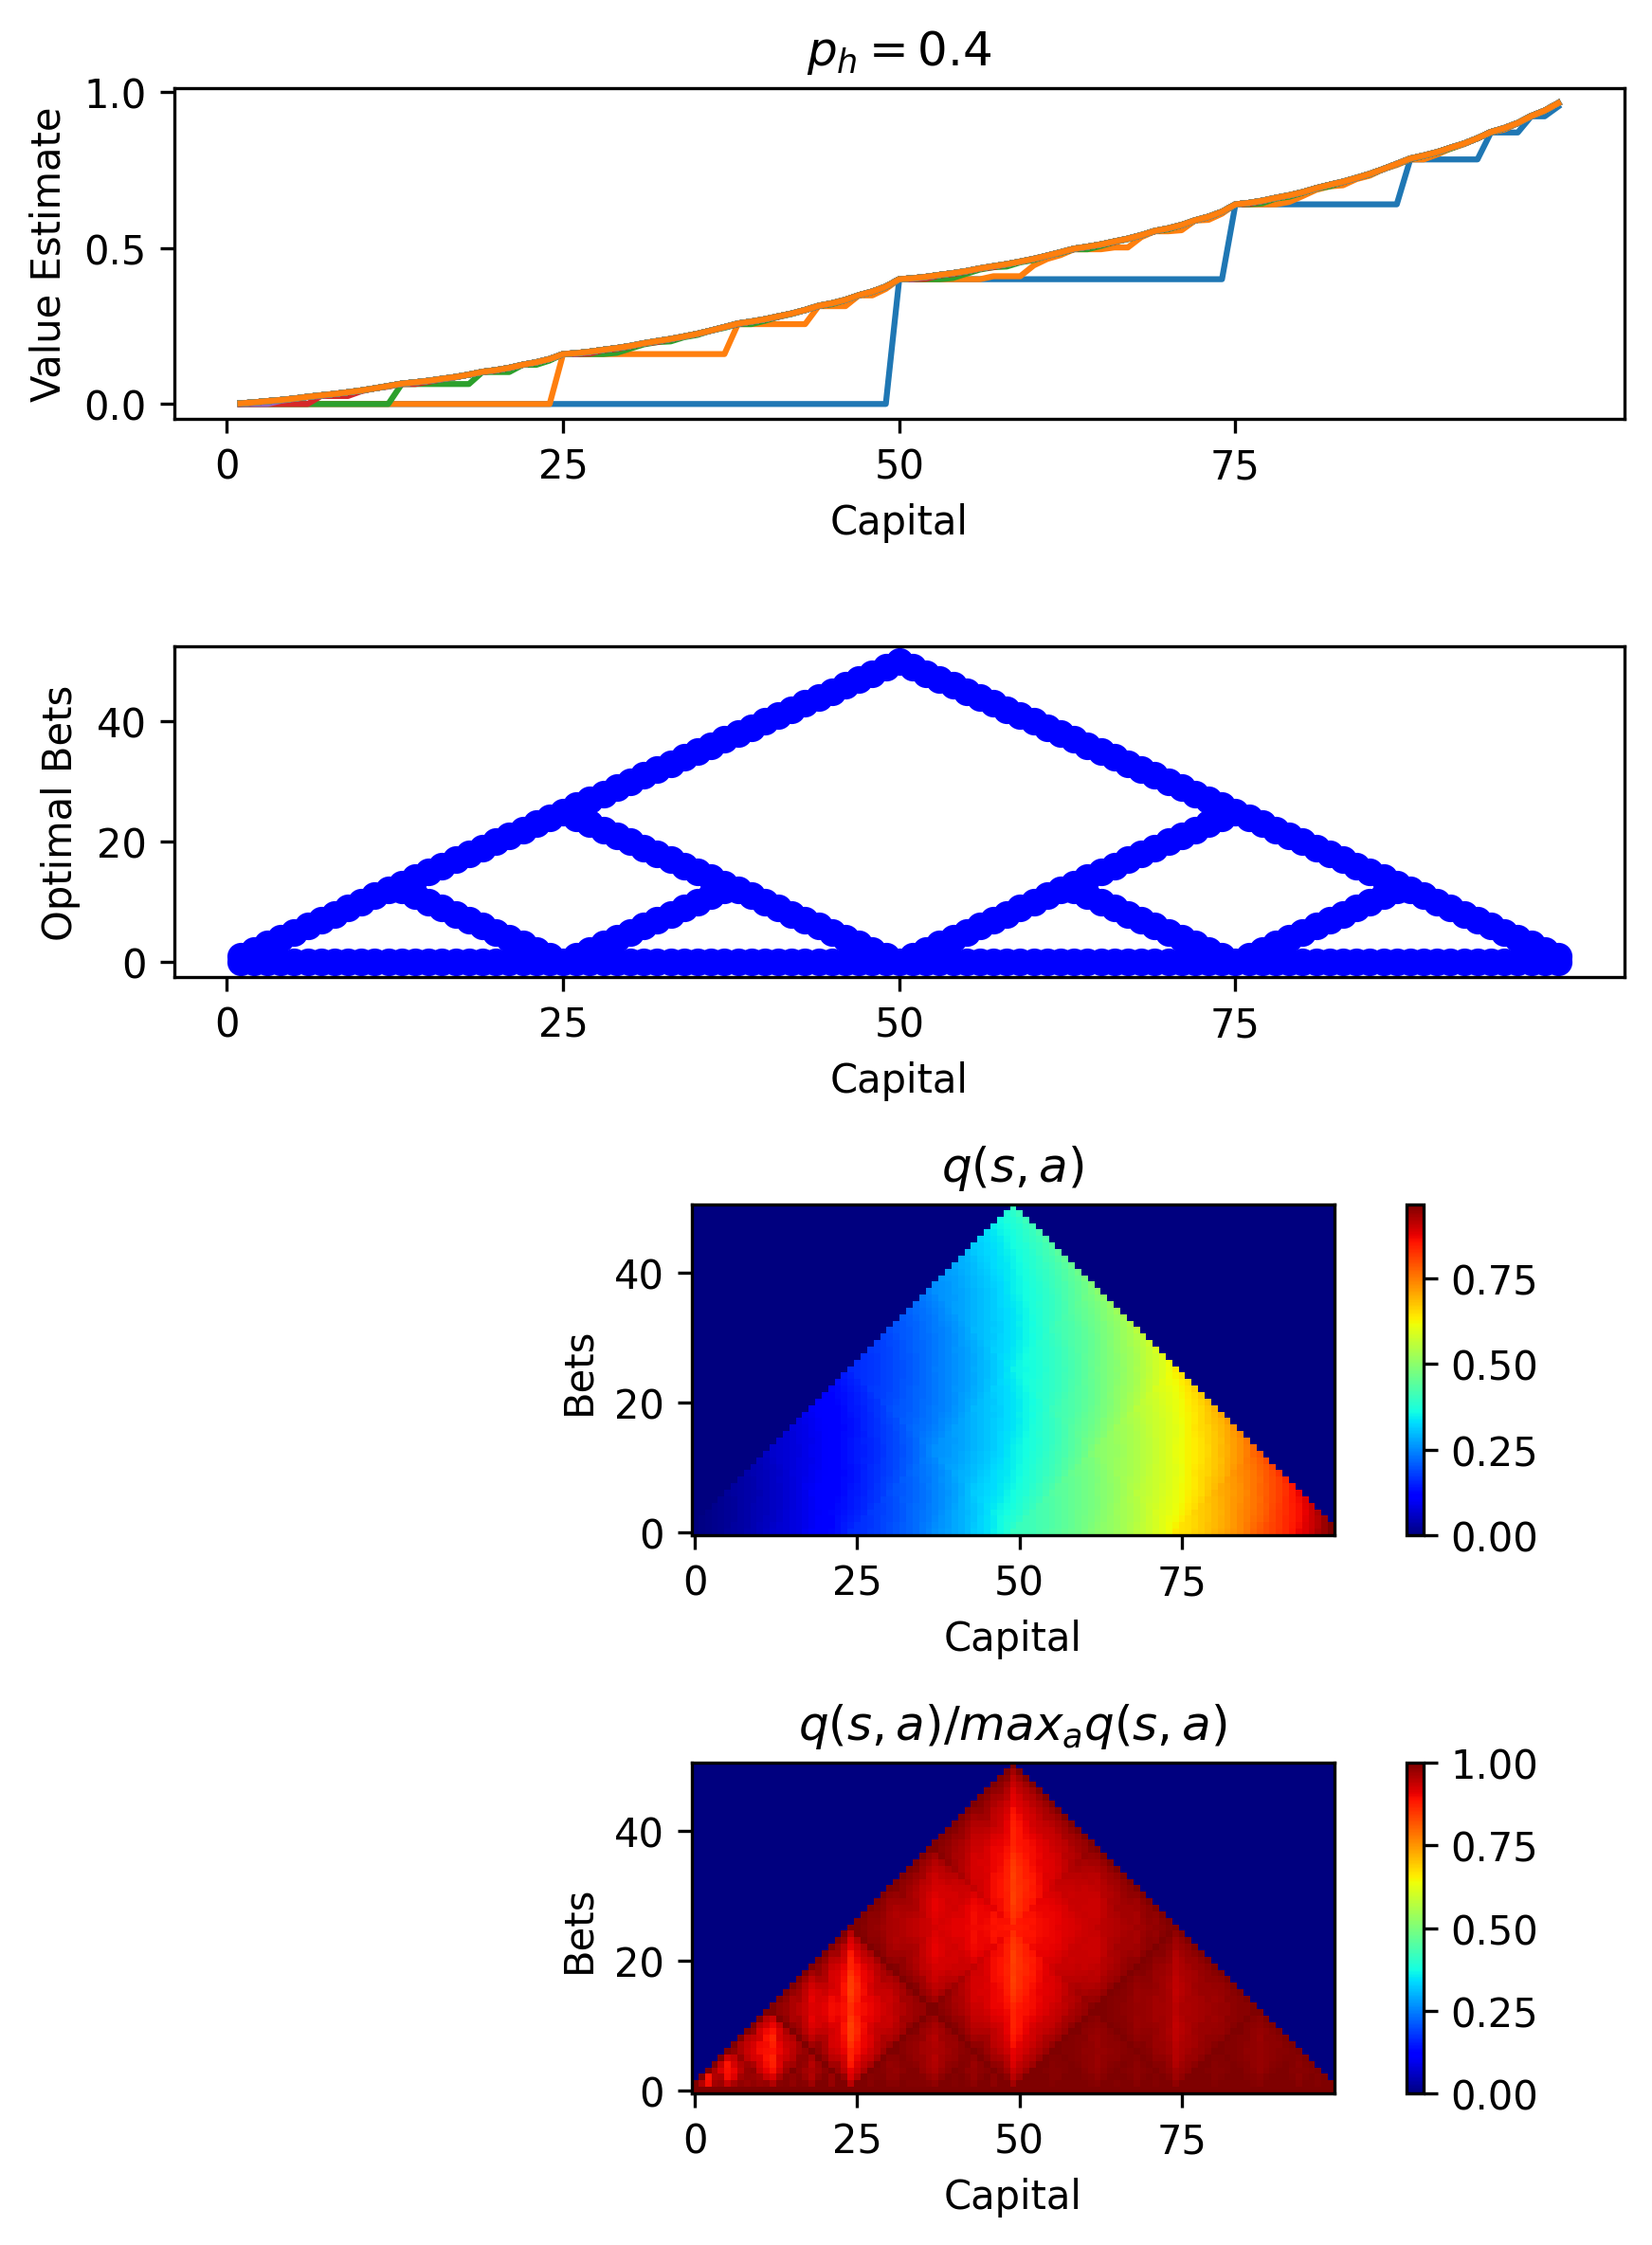

In [208]:
plt.figure(figsize = (6, 8), dpi=300)
plt.subplot(411)

for indx, v in enumerate(V_hist):
    plt.plot(range(1, target), v[1:target], label=f"Sweep {indx}")

plt.xlabel("Capital")
plt.ylabel("Value Estimate")
plt.xticks([0, 25, 50, 75])
plt.title("$p_h = 0.4$")
# plt.legend()

plt.subplot(412)
for s, A in optimum_policy:
    if s == 0 or s==target:
        pass
    
    for a in A:
        plt.scatter(s, a, color="blue")
plt.xlabel("Capital")
plt.ylabel("Optimal Bets")
plt.xticks([0, 25, 50, 75])
plt.tight_layout()

plt.subplot(413)
# action_value_rescaling
np.max(action_value_all.T, axis=1)
plt.imshow(action_value_all.T, origin="lower", cmap=plt.cm.jet)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.tight_layout()
plt.title("$q(s, a)$")

plt.subplot(414)
# action_value_rescaling
plt.imshow(action_value_all.T / np.max(action_value_all.T, axis=0), origin="lower", cmap=plt.cm.jet, vmin=0, vmax=1)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.title("$q(s, a) / max_a q(s, a)$")
plt.tight_layout()

plt.savefig("reprod.pdf")

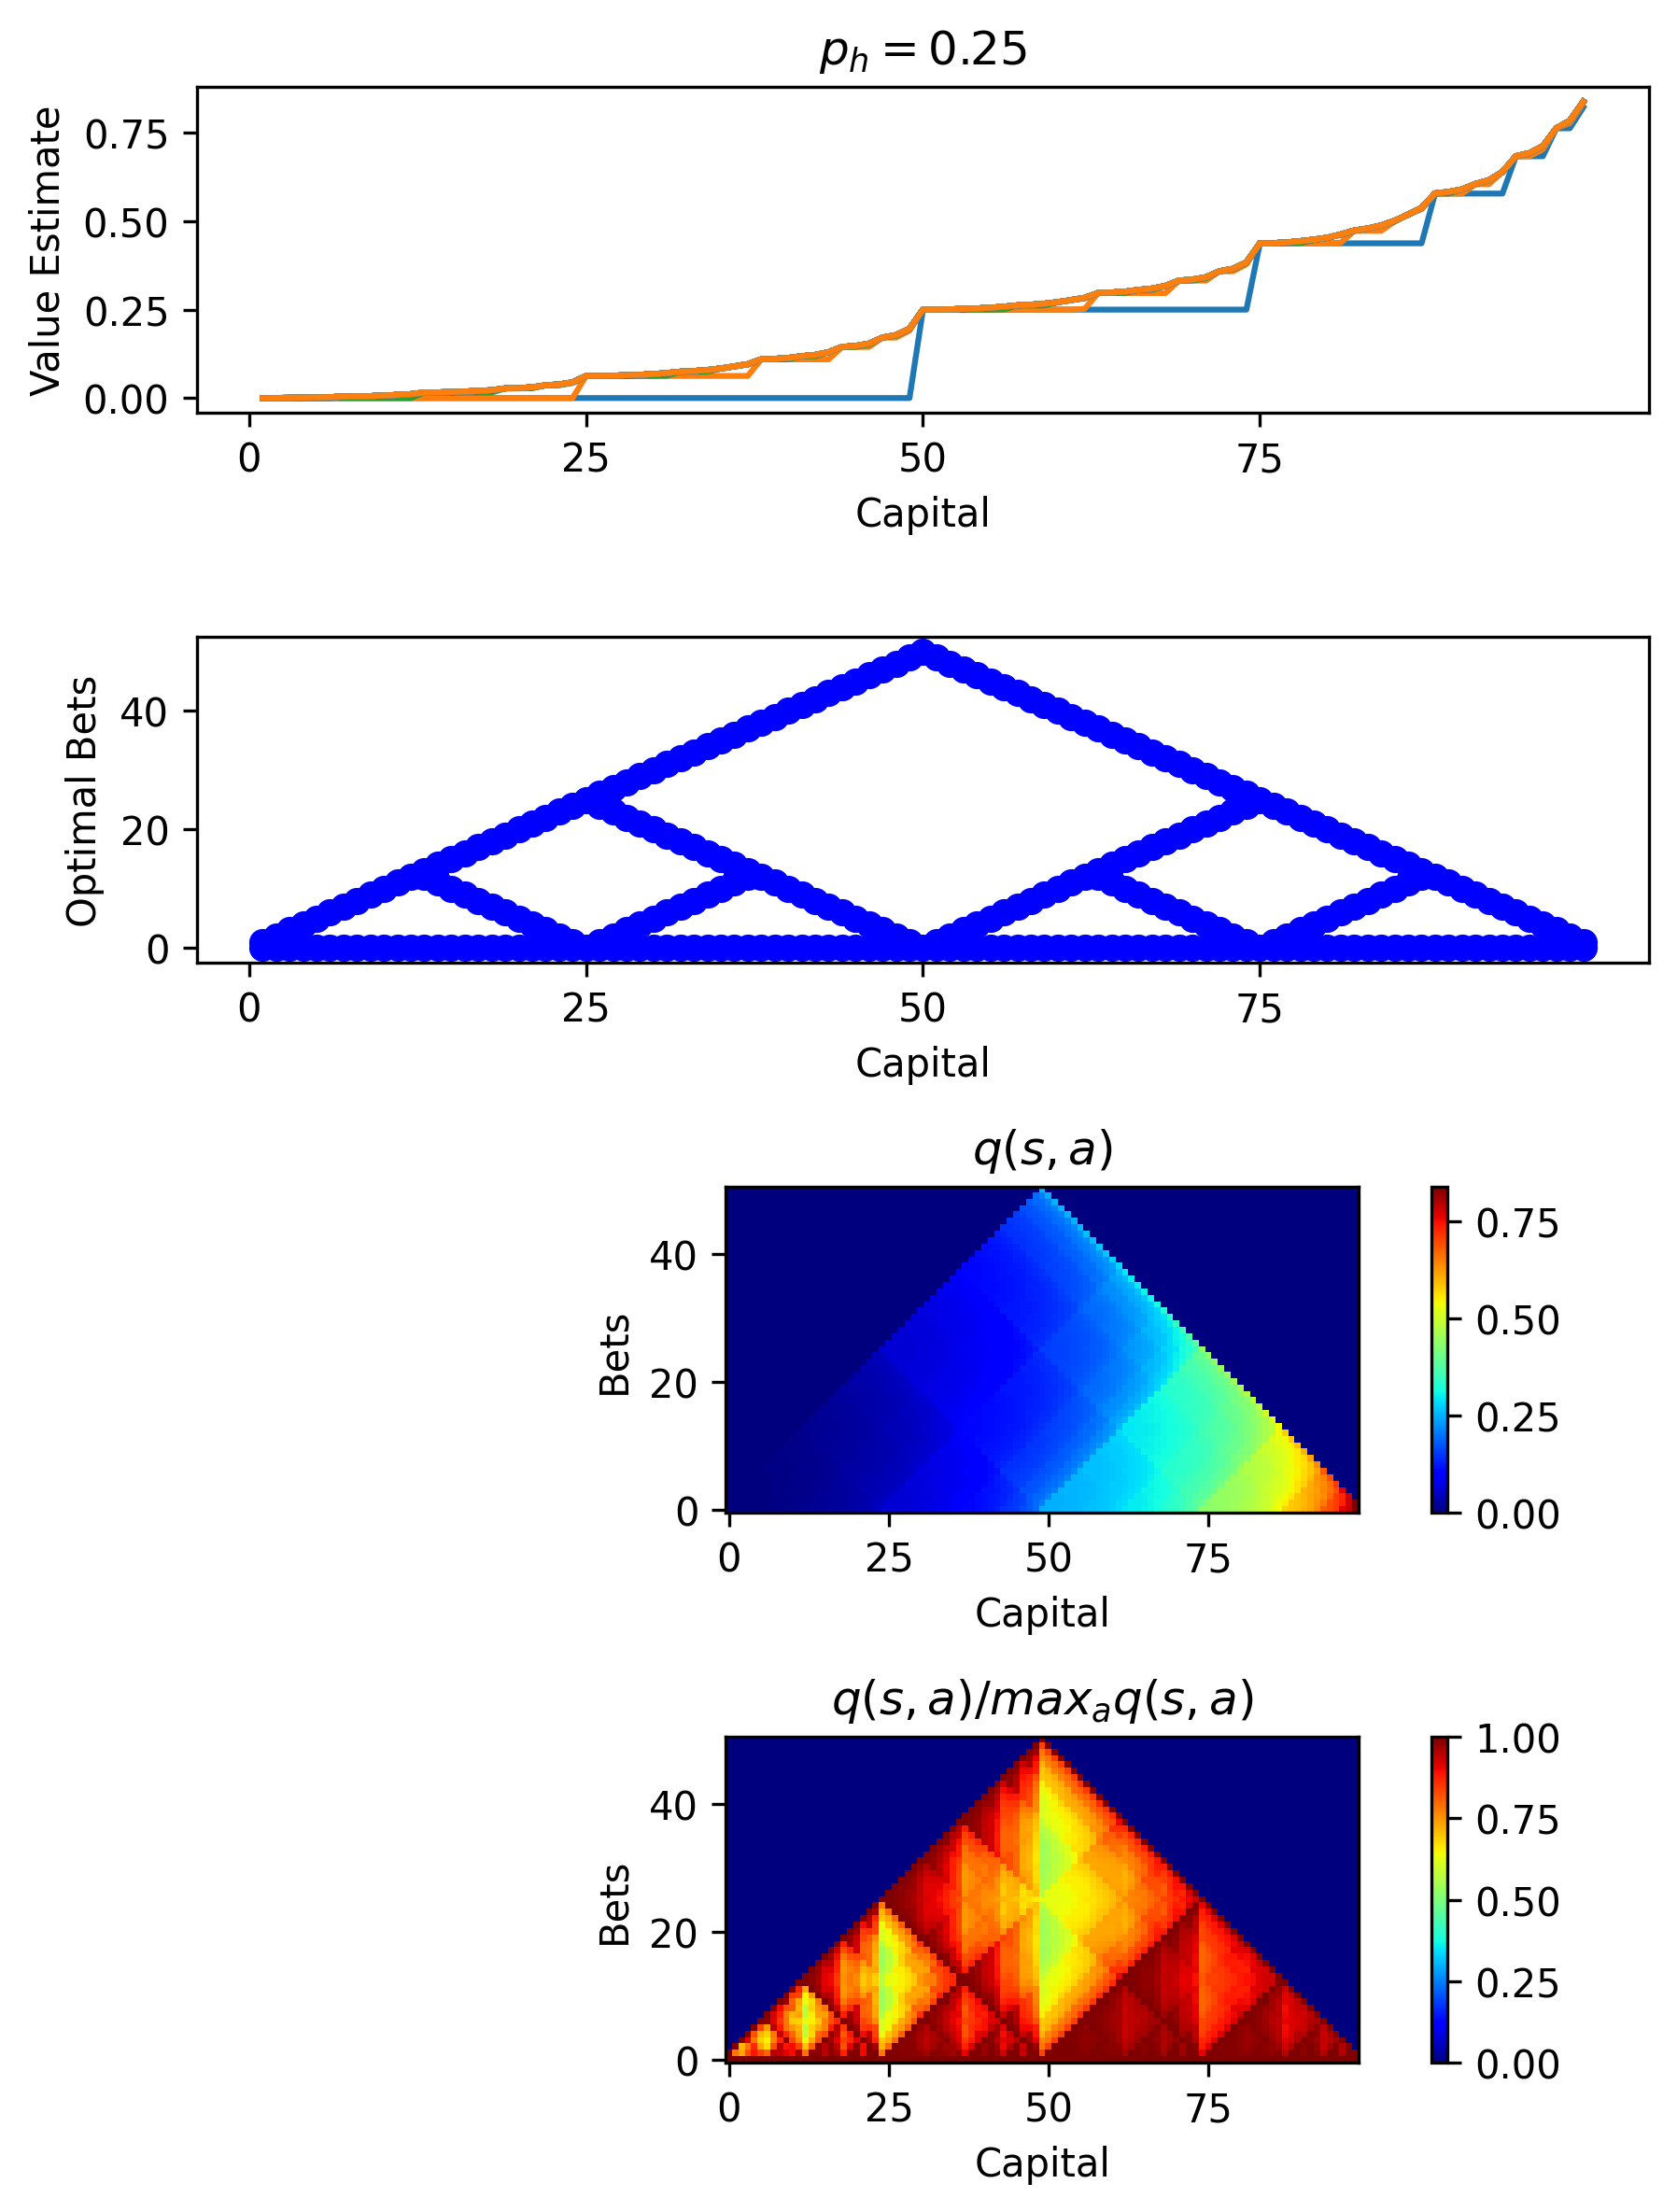

In [212]:
target = 100
v_init = np.zeros(shape=target+1)

V, optimum_policy, action_value_all, V_hist = value_iteration(v_init, lambda s, a: dynamics_model(s, a, p_h=0.25))

plt.figure(figsize = (6, 8), dpi=300)
plt.subplot(411)

for indx, v in enumerate(V_hist):
    plt.plot(range(1, target), v[1:target], label=f"Sweep {indx}")

plt.xlabel("Capital")
plt.ylabel("Value Estimate")
plt.xticks([0, 25, 50, 75])
plt.title("$p_h = 0.25$")
# plt.legend()

plt.subplot(412)
for s, A in optimum_policy:
    if s == 0 or s==target:
        pass
    
    for a in A:
        plt.scatter(s, a, color="blue")
plt.xlabel("Capital")
plt.ylabel("Optimal Bets")
plt.xticks([0, 25, 50, 75])
plt.tight_layout()

plt.subplot(413)
# action_value_rescaling
np.max(action_value_all.T, axis=1)
plt.imshow(action_value_all.T, origin="lower", cmap=plt.cm.jet)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.tight_layout()
plt.title("$q(s, a)$")

plt.subplot(414)
# action_value_rescaling
plt.imshow(action_value_all.T / np.max(action_value_all.T, axis=0), origin="lower", cmap=plt.cm.jet, vmin=0, vmax=1)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.title("$q(s, a) / max_a q(s, a)$")
plt.tight_layout()

plt.savefig("more_unfair.pdf")

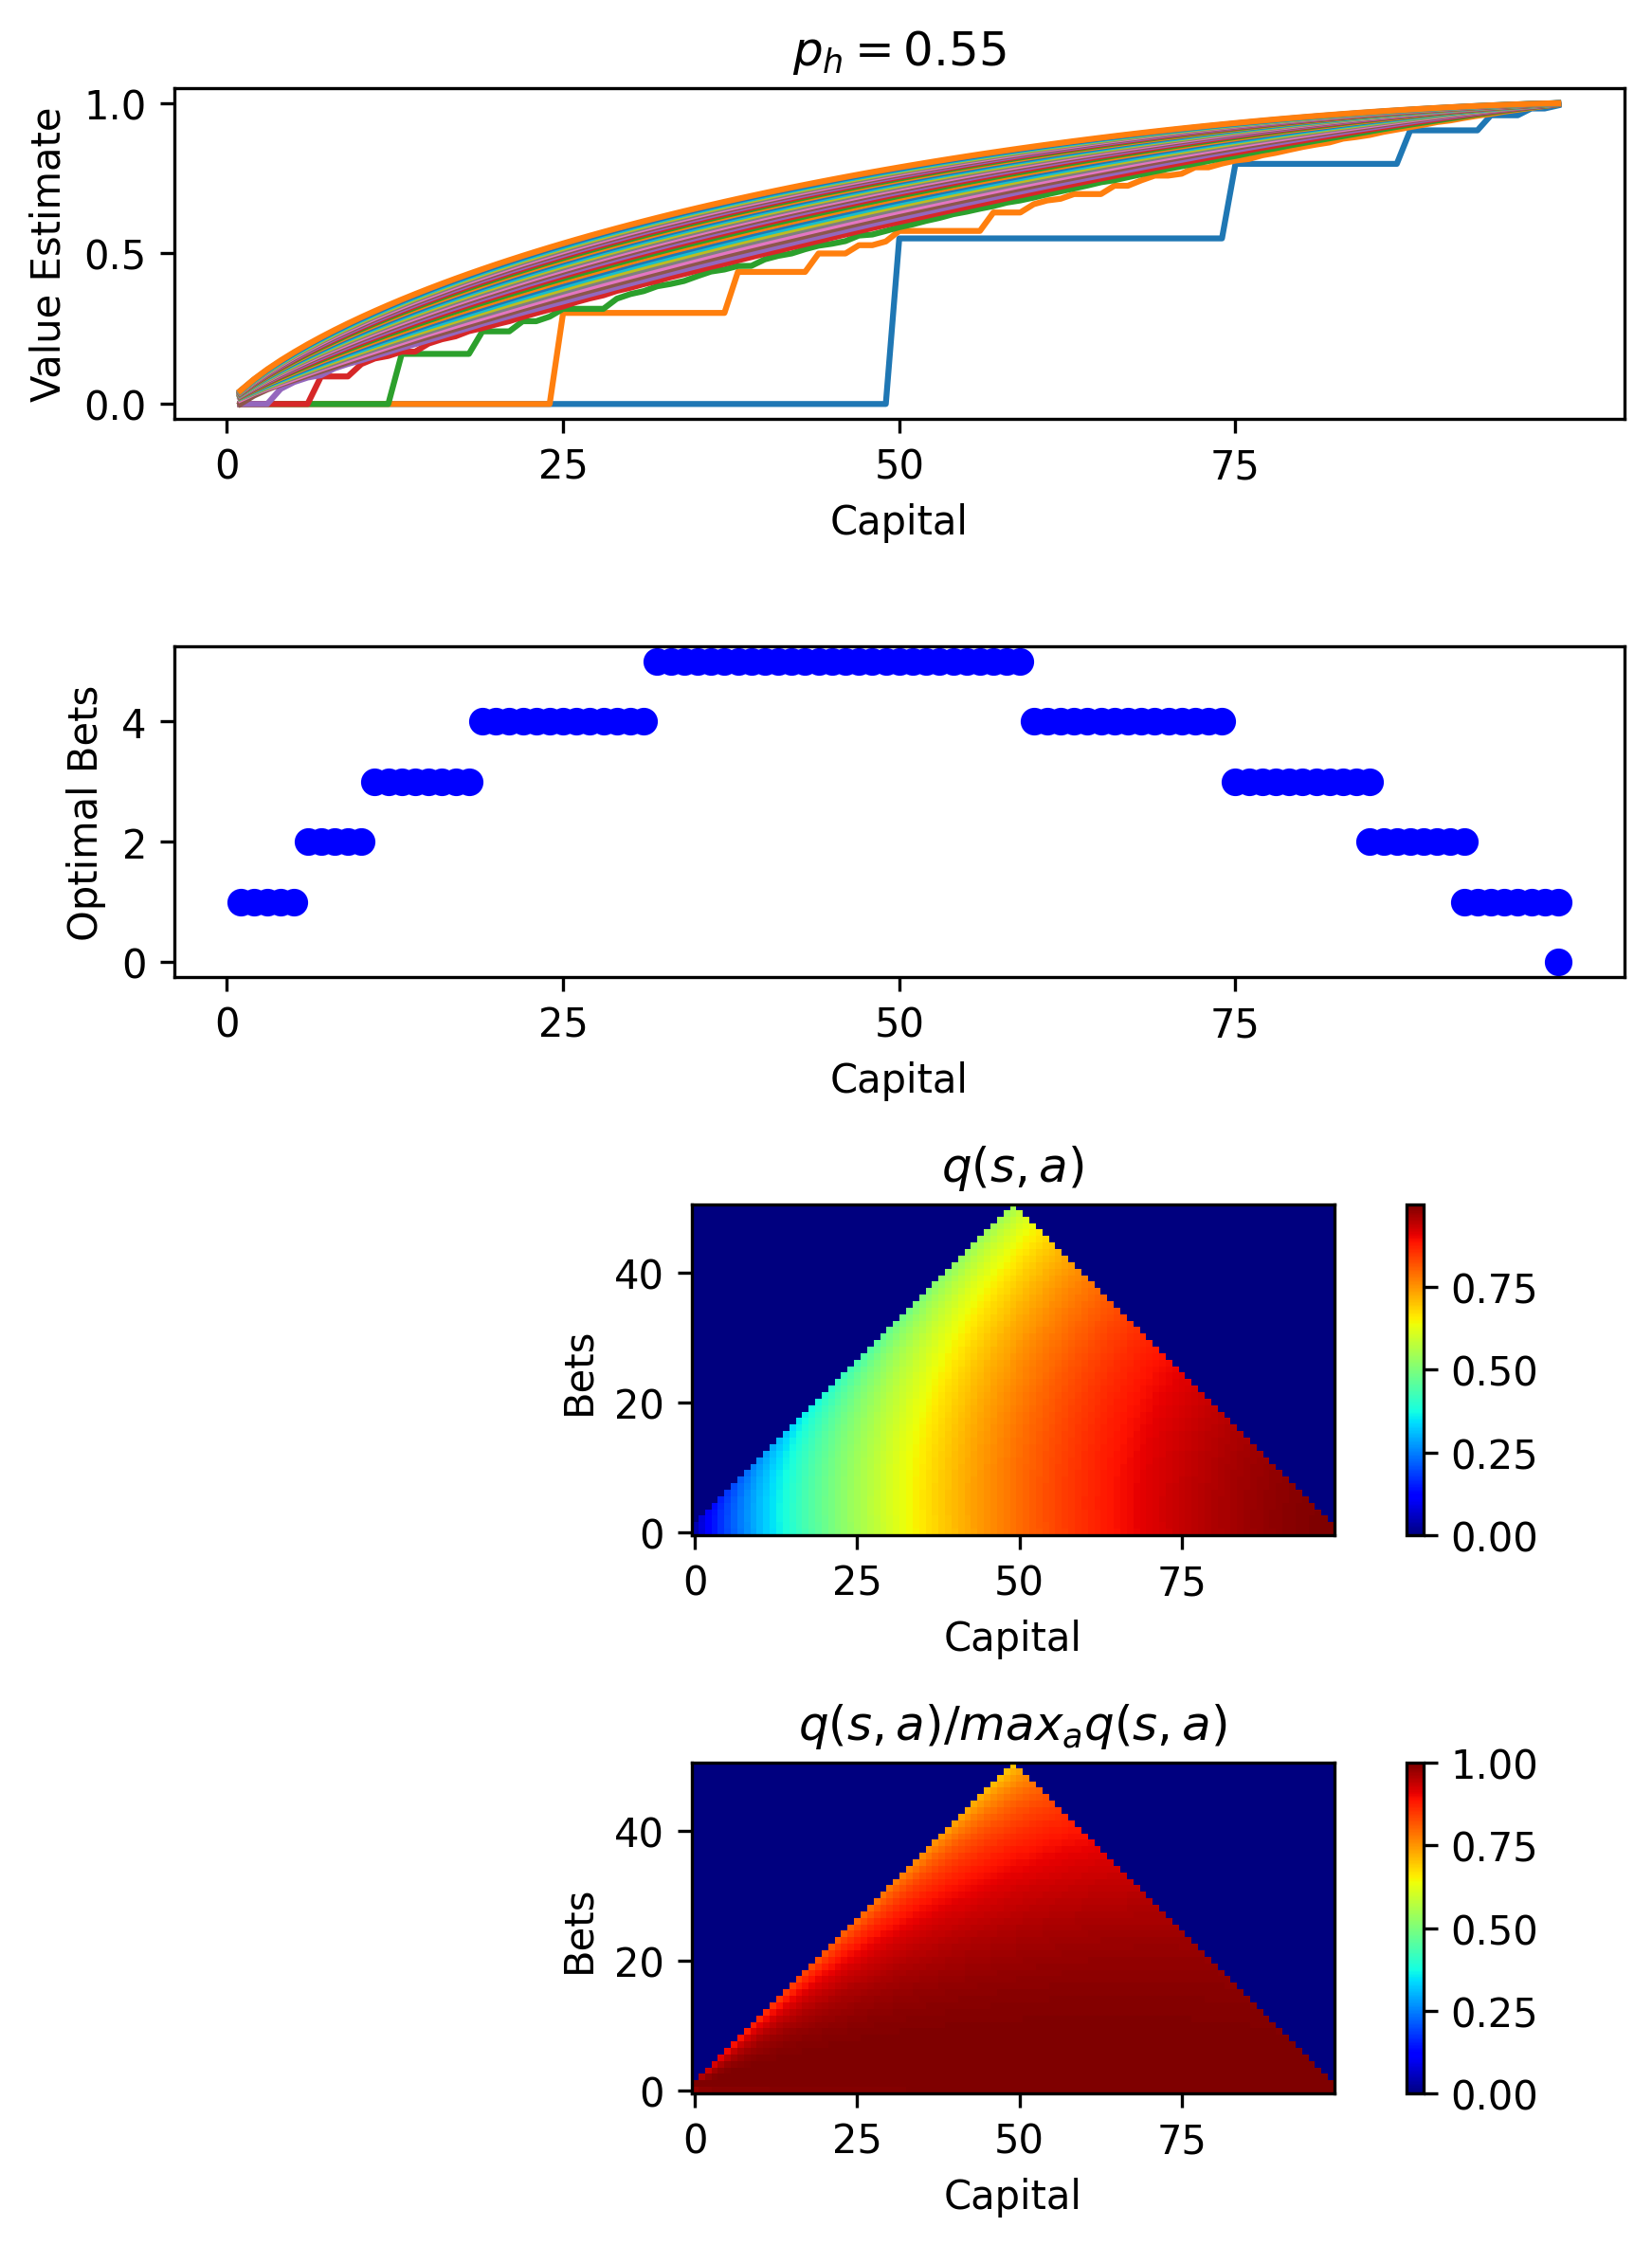

In [213]:
target = 100
v_init = np.zeros(shape=target+1)

V, optimum_policy, action_value_all, V_hist = value_iteration(v_init, lambda s, a: dynamics_model(s, a, p_h=0.55))

plt.figure(figsize = (6, 8), dpi=300)
plt.subplot(411)

for indx, v in enumerate(V_hist):
    plt.plot(range(1, target), v[1:target], label=f"Sweep {indx}")

plt.xlabel("Capital")
plt.ylabel("Value Estimate")
plt.xticks([0, 25, 50, 75])
plt.title("$p_h = 0.55$")
# plt.legend()

plt.subplot(412)
for s, A in optimum_policy:
    if s == 0 or s==target:
        pass
    
    for a in A:
        plt.scatter(s, a, color="blue")
plt.xlabel("Capital")
plt.ylabel("Optimal Bets")
plt.xticks([0, 25, 50, 75])
plt.tight_layout()

plt.subplot(413)
# action_value_rescaling
np.max(action_value_all.T, axis=1)
plt.imshow(action_value_all.T, origin="lower", cmap=plt.cm.jet)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.tight_layout()
plt.title("$q(s, a)$")

plt.subplot(414)
# action_value_rescaling
plt.imshow(action_value_all.T / np.max(action_value_all.T, axis=0), origin="lower", cmap=plt.cm.jet, vmin=0, vmax=1)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.title("$q(s, a) / max_a q(s, a)$")
plt.tight_layout()

plt.savefig("less_unfair.pdf")

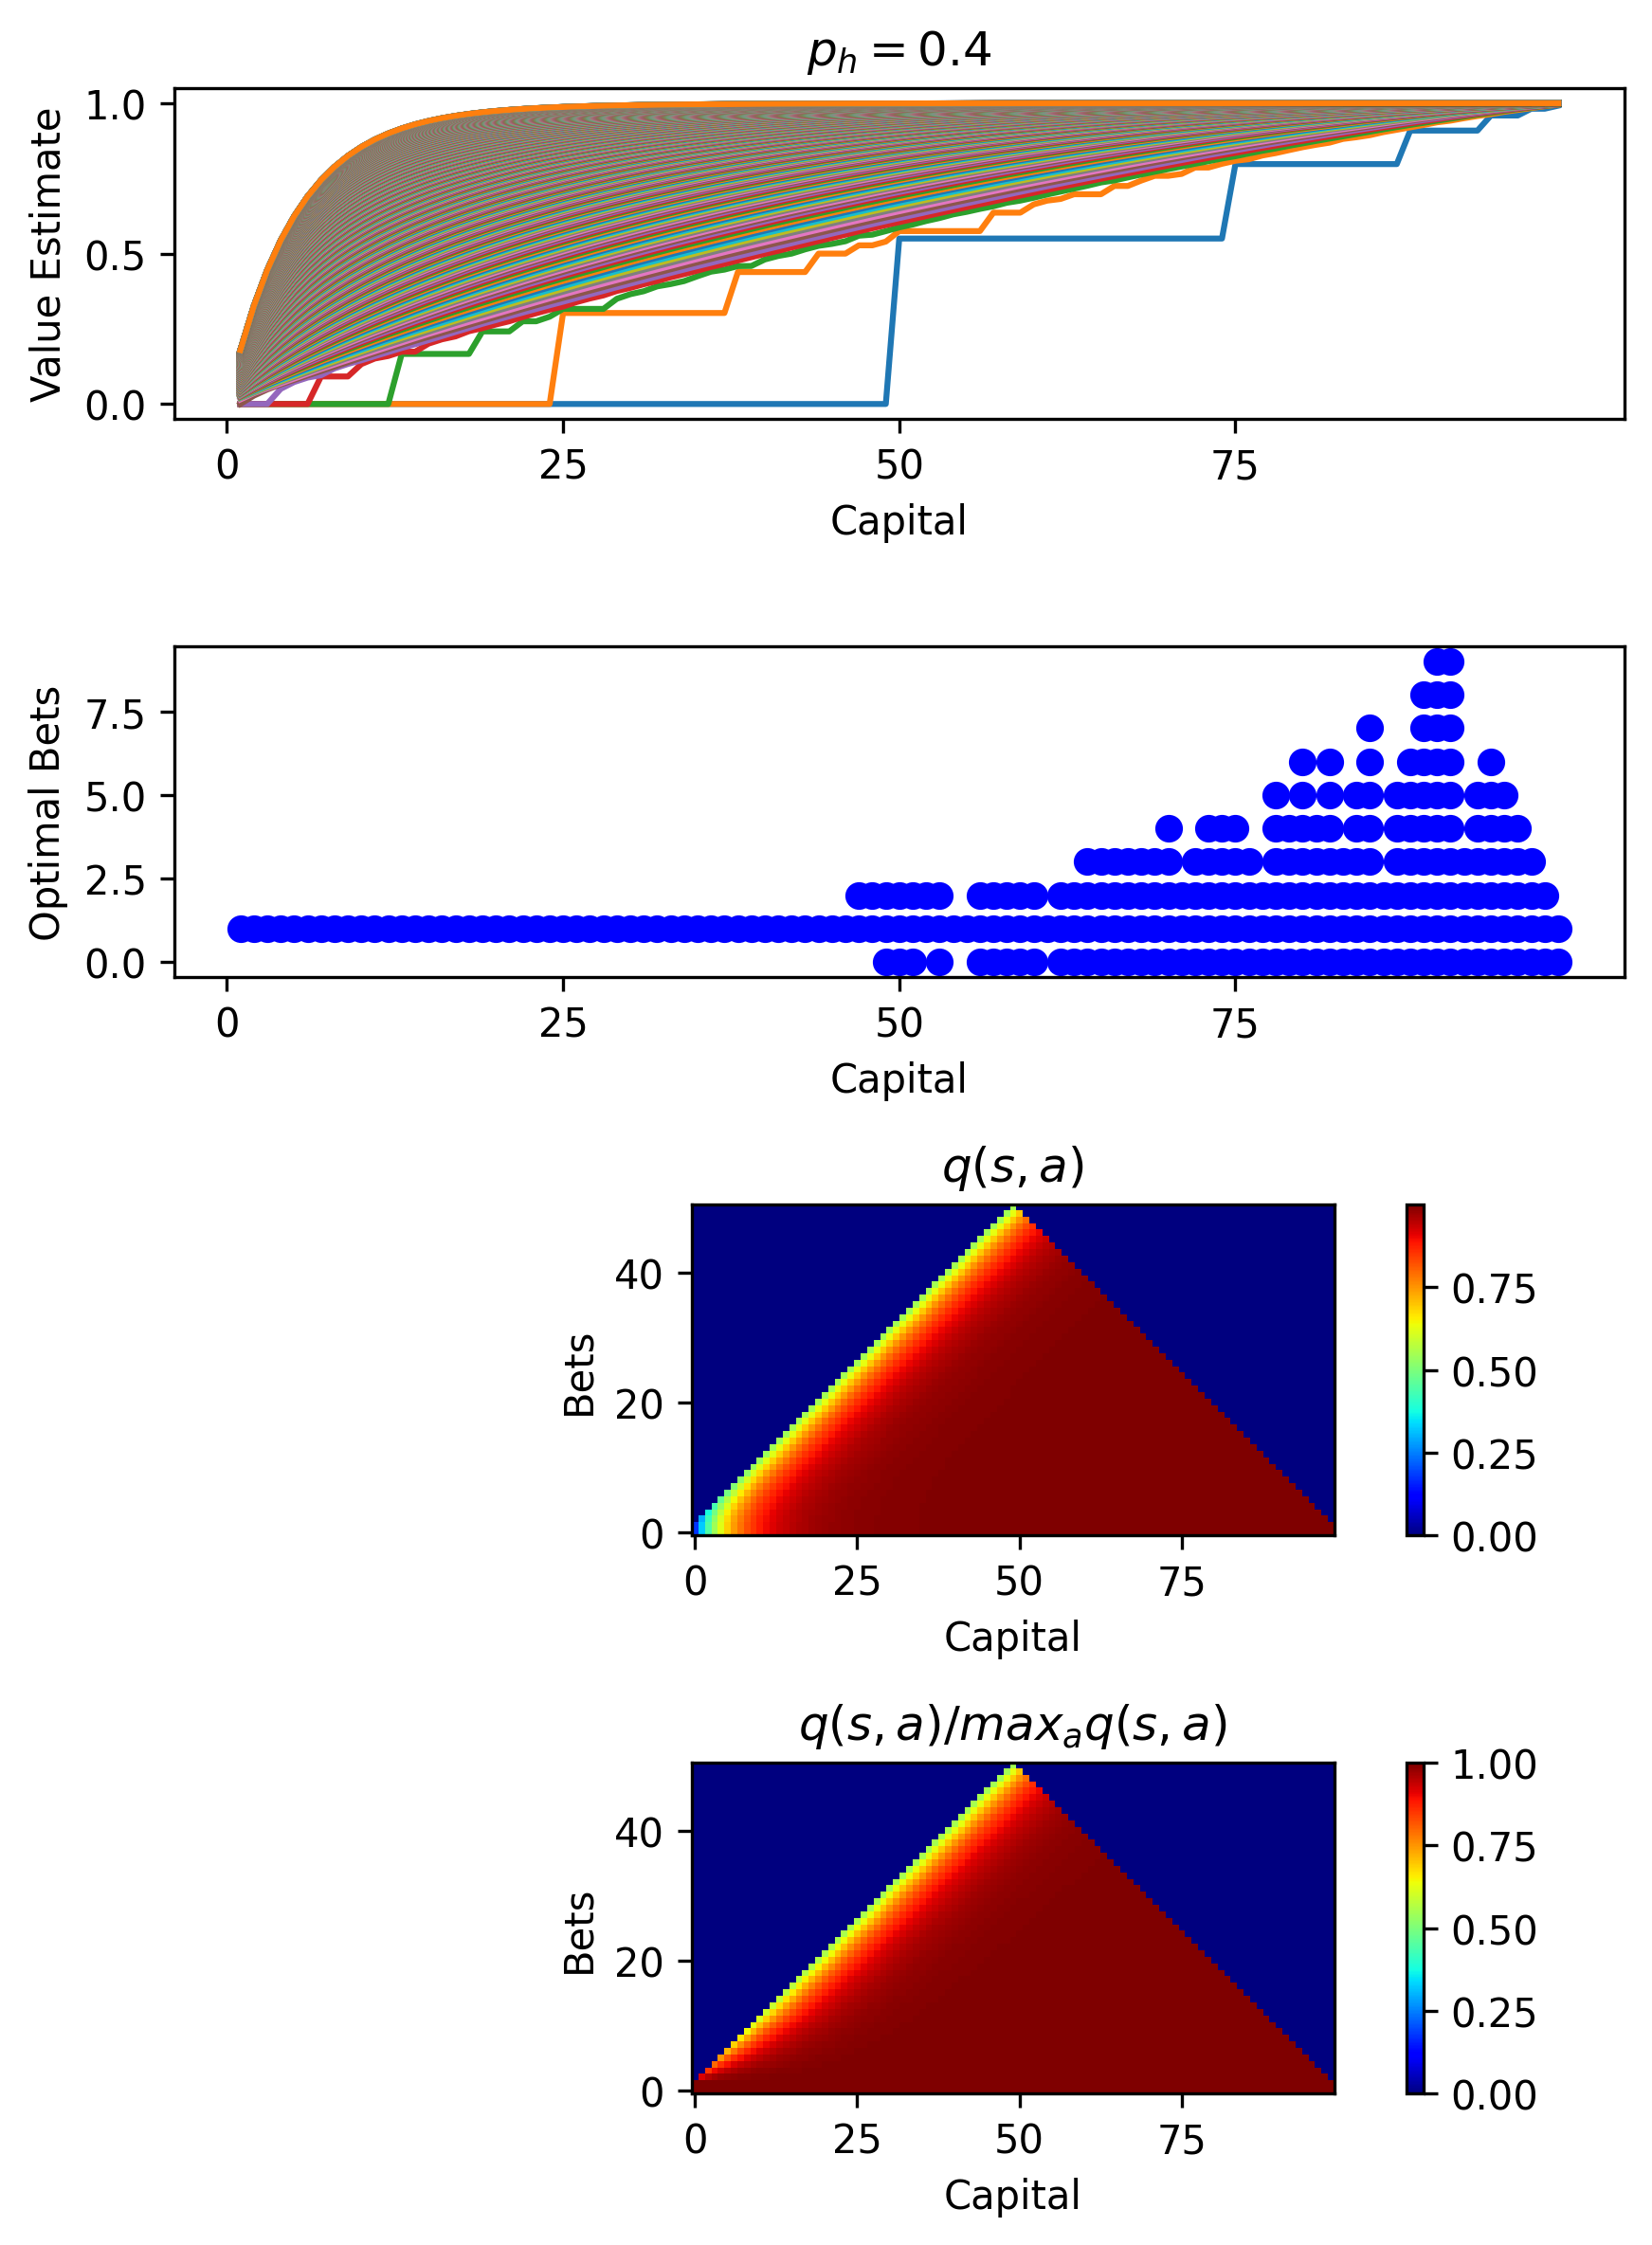

In [221]:
target = 100
v_init = np.zeros(shape=target+1)

V, optimum_policy, action_value_all, V_hist = value_iteration(v_init, lambda s, a: dynamics_model(s, a, p_h=0.55), num_runs=512)

plt.figure(figsize = (6, 8), dpi=300)
plt.subplot(411)

for indx, v in enumerate(V_hist):
    plt.plot(range(1, target), v[1:target], label=f"Sweep {indx}")

plt.xlabel("Capital")
plt.ylabel("Value Estimate")
plt.xticks([0, 25, 50, 75])
plt.title("$p_h = 0.4$")
# plt.legend()

plt.subplot(412)
for s, A in optimum_policy:
    if s == 0 or s==target:
        pass
    
    for a in A:
        plt.scatter(s, a, color="blue")
plt.xlabel("Capital")
plt.ylabel("Optimal Bets")
plt.xticks([0, 25, 50, 75])
plt.tight_layout()

plt.subplot(413)
# action_value_rescaling
np.max(action_value_all.T, axis=1)
plt.imshow(action_value_all.T, origin="lower", cmap=plt.cm.jet)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.tight_layout()
plt.title("$q(s, a)$")

plt.subplot(414)
# action_value_rescaling
plt.imshow(action_value_all.T / np.max(action_value_all.T, axis=0), origin="lower", cmap=plt.cm.jet, vmin=0, vmax=1)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.title("$q(s, a) / max_a q(s, a)$")
plt.tight_layout()

plt.savefig("less_unfair_more_runs.pdf")

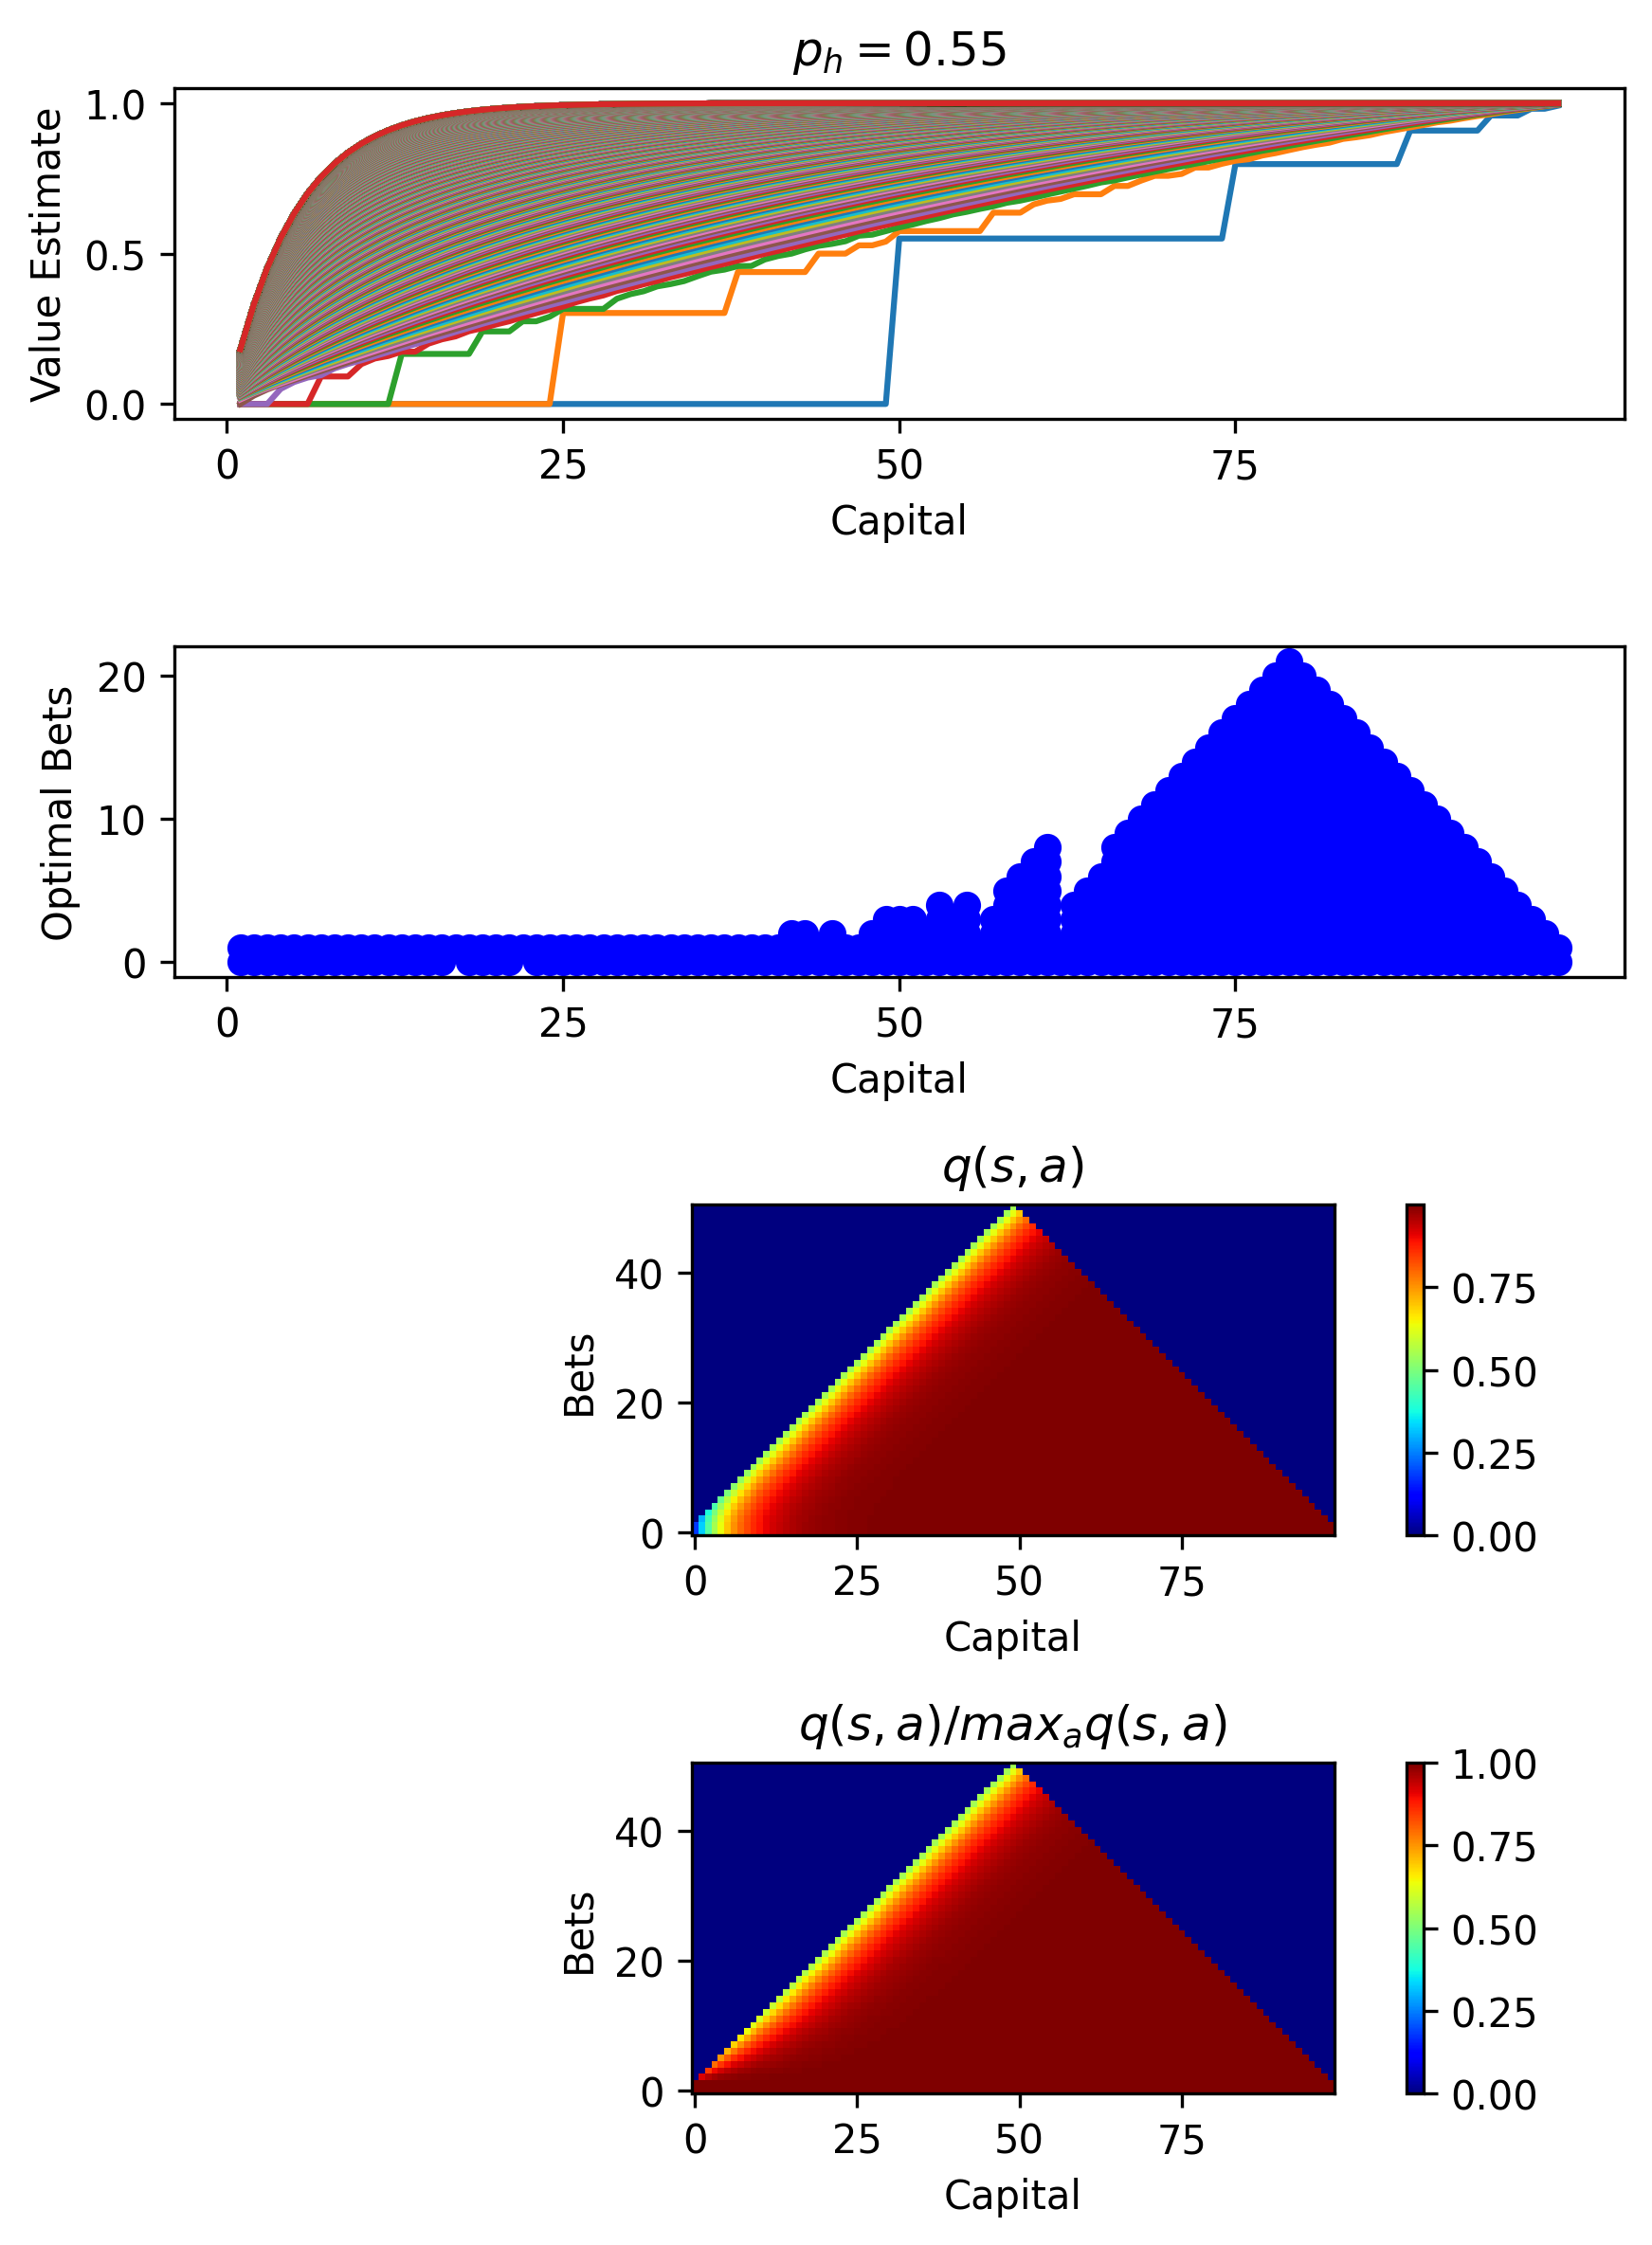

In [223]:
target = 100
v_init = np.zeros(shape=target+1)

V, optimum_policy, action_value_all, V_hist = value_iteration(v_init, lambda s, a: dynamics_model(s, a, p_h=0.55), num_runs=1024)

plt.figure(figsize = (6, 8), dpi=300)
plt.subplot(411)

for indx, v in enumerate(V_hist):
    plt.plot(range(1, target), v[1:target], label=f"Sweep {indx}")

plt.xlabel("Capital")
plt.ylabel("Value Estimate")
plt.xticks([0, 25, 50, 75])
plt.title("$p_h = 0.55$")
# plt.legend()

plt.subplot(412)
for s, A in optimum_policy:
    if s == 0 or s==target:
        pass
    
    for a in A:
        plt.scatter(s, a, color="blue")
plt.xlabel("Capital")
plt.ylabel("Optimal Bets")
plt.xticks([0, 25, 50, 75])
plt.tight_layout()

plt.subplot(413)
# action_value_rescaling
np.max(action_value_all.T, axis=1)
plt.imshow(action_value_all.T, origin="lower", cmap=plt.cm.jet)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.tight_layout()
plt.title("$q(s, a)$")

plt.subplot(414)
# action_value_rescaling
plt.imshow(action_value_all.T / np.max(action_value_all.T, axis=0), origin="lower", cmap=plt.cm.jet, vmin=0, vmax=1)
plt.xlabel("Capital")
plt.ylabel("Bets")
plt.xticks([0, 25, 50, 75])
plt.colorbar()
plt.title("$q(s, a) / max_a q(s, a)$")
plt.tight_layout()

plt.savefig("less_unfair_even_more_runs.pdf")